# Import and Global Init

In [47]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20             # No. of points for the Dataset
xTrainData=np.zeros(n)     # Independent points 
yTrainData=np.zeros(n)     # Dependent points
variance = 0.15

# Create Training Dataset

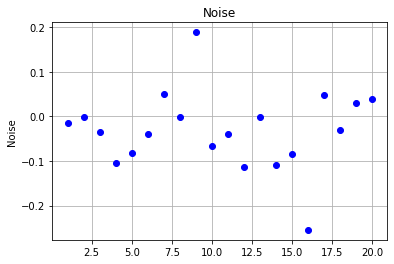

In [48]:
# Normal distribution Noise Generation
noise=np.random.normal(0,variance,n); #(mean, variance, no. of points)
xNoise = np.arange(1,n+1,1)

# Plot of Noise
plt.plot(xNoise,noise,'bo');
plt.xlabel('');
plt.ylabel('Noise');
plt.title('Noise');
plt.grid()
plt.show()

In [49]:
# Generation of Random Dataset as training => y = sin(x) + noise
for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTrainData[i] = temp
    yTrainData[i] = math.sin(temp)+noise[i]

xTrainData = xTrainData.reshape(n,1)
yTrainData = yTrainData.reshape(n,1)

print('Randomly Generated Train Dataset with n points')
# print('X | Y');
# for i in range(0,n):
#   print(xTrainData[i] , ' | ' , yTrainData[i]);


Randomly Generated Train Dataset with n points


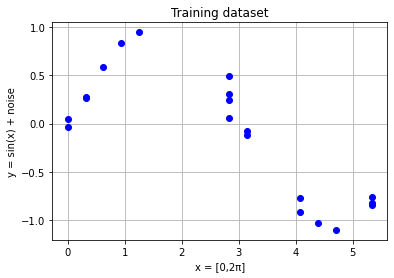

In [50]:
# Plot of Training Dataset
plt.plot(xTrainData,yTrainData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training dataset');
plt.grid()
plt.show()

# Create Testing Dataset

In [51]:
# Generation of Random Dataset as training => y = sin(x)

xTestData=np.zeros(n);       # Independent points 
yTestData=np.zeros(n);       # Dependent points

for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTestData[i] = temp
    yTestData[i] = math.sin(temp)

xTestData = xTestData.reshape(n,1)
yTestData = yTestData.reshape(n,1)

print('Randomly Generated Test Dataset with 20 points')
# print('X | Y');
# for i in range(0,n):
#   print(xTestData[i] , ' | ' , yTestData[i]);


Randomly Generated Test Dataset with 20 points


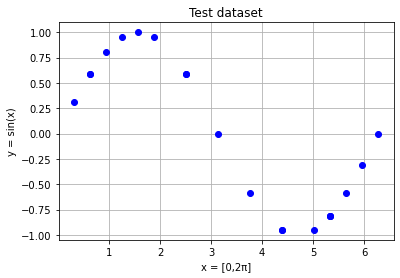

In [52]:
# Plot of Test Dataset
plt.plot(xTestData,yTestData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x)');
plt.title('Test dataset');
plt.grid()
plt.show()

# Prediction

## Direct linear regression

In [53]:
# Fitting Direct Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrainData, yTrainData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
yPredictData = regressor.predict(xTestData)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yTestData, yPredictData, squared=True)

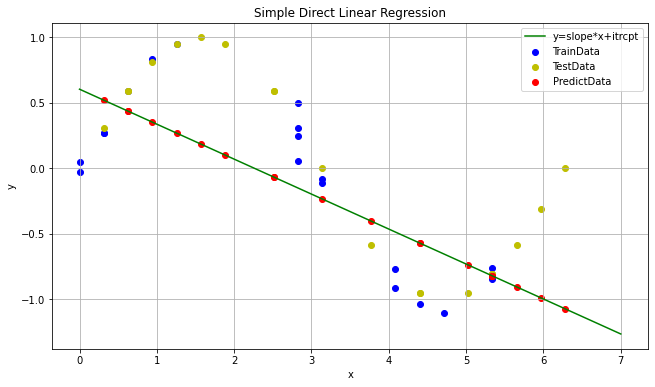

mse = 0.2572068551574018


In [55]:
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
# print(slope)
# print(intercept)


plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictData,color = 'r', label='PredictData');

xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept

plt.plot(xPredictionLine, yPredictionLine, '-g', label='y=slope*x+itrcpt')


plt.title('Simple Direct Linear Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('mse =',mse)

## Multiple Linear Regression

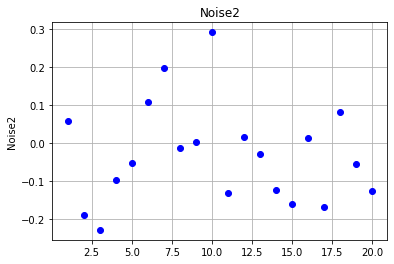

Randomly Generated Train Dataset with n points


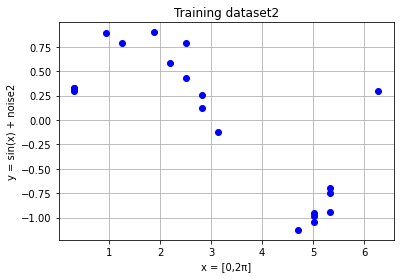

In [56]:
# make x2
# it will be same as creating x1

x2TrainData=np.zeros(n);       # Independent points 
y2TrainData=np.zeros(n);       # Dependent points

# Normal distribution Noise Generation
noise2=np.random.normal(0,variance,n); #(mean, variance, no. of points)
xNoise = np.arange(1,n+1,1)

# Plot of Noise
plt.plot(xNoise,noise2,'bo');
plt.xlabel('');
plt.ylabel('Noise2');
plt.title('Noise2');
plt.grid()
plt.show()

# Generation of Random Dataset as training => y = sin(x) + noise2
for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    x2TrainData[i] = temp
    y2TrainData[i] = math.sin(temp)+noise2[i]
x2TrainData = x2TrainData.reshape(n,1)
y2TrainData = y2TrainData.reshape(n,1)

print('Randomly Generated Train Dataset with n points')
# print('X | Y');
# for i in range(0,n):
#   print(x2TrainData[i] , ' | ' , y2TrainData[i]);

# Plot of Training Dataset
plt.plot(x2TrainData,y2TrainData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise2');
plt.title('Training dataset2');
plt.grid()
plt.show()

In [57]:
xCombineTrainData = np.c_[xTrainData,x2TrainData]
xCombineTrainData.shape

yCombineTrainData = np.c_[yTrainData,y2TrainData]
yCombineTrainData.shape

(20, 2)

In [58]:
# Fitting Direct Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(xCombineTrainData, yTrainData)

yPredictData = regressor.predict(np.c_[xTestData,xTestData])

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yTestData, yPredictData, squared=True)
print('mse =',mse)

mse = 0.2603948931739557


-0.27408709020038735 0.017713292952804608
0.5681557563223608


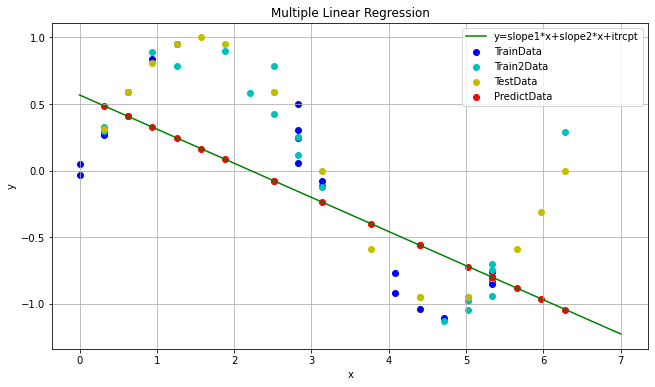

mse = 0.2603948931739557


In [59]:
slope1 = regressor.coef_[0][0]
slope2 = regressor.coef_[0][1]
intercept = regressor.intercept_[0]
print(slope1,slope2)
print(intercept)


plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(x2TrainData,y2TrainData,color = 'c' , label='Train2Data');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictData,color = 'r', label='PredictData');

xPredictionLineMR = np.linspace(0,7,n)
yPredictionLineMR = slope1*xPredictionLineMR + slope2*xPredictionLineMR +intercept

plt.plot(xPredictionLineMR, yPredictionLineMR, '-g', label='y=slope1*x+slope2*x+itrcpt')


plt.title('Multiple Linear Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('mse =',mse)

##Polynomial Regression of degree M

##Ridge regression



In [76]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 1.0)
rr.fit(xTrainData, yTrainData)
yPredictDataRidge = rr.predict(xTestData)

mseRidge = mean_squared_error(yTestData, yPredictDataRidge, squared=True)

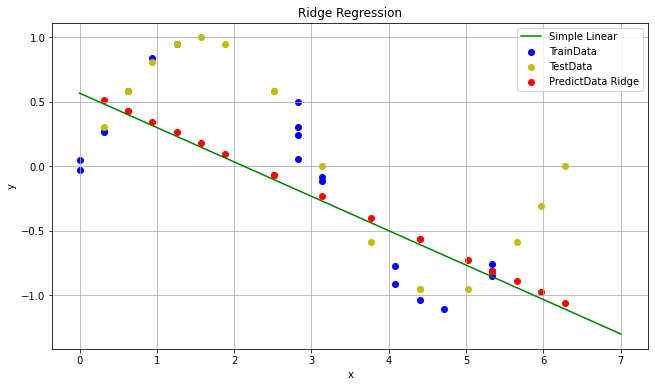

mse = 0.2567429241129827


In [77]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictDataRidge,color = 'r', label='PredictData Ridge');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Ridge Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()


print('mse =',mseRidge)

##Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

lr = Lasso(alpha=0.1)
lr.fit(xTrainData, yTrainData)
yPredictDataLasso = lr.predict(xTestData)

mseLasso = mean_squared_error(yTestData, yPredictDataLasso, squared=True)

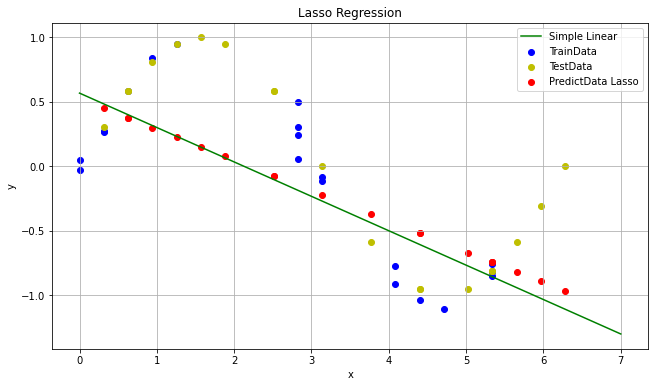

mse = 0.25698009195220795


In [83]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictDataLasso,color = 'r', label='PredictData Lasso');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Lasso Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()


print('mse =',mseLasso)

##Elastic Net Regression

In [87]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 0.1)
enet.fit(xTrainData, yTrainData)
yPredictDataEnet = enet.predict(xTestData)

mseEnet = mean_squared_error(yTestData, yPredictDataEnet, squared=True)


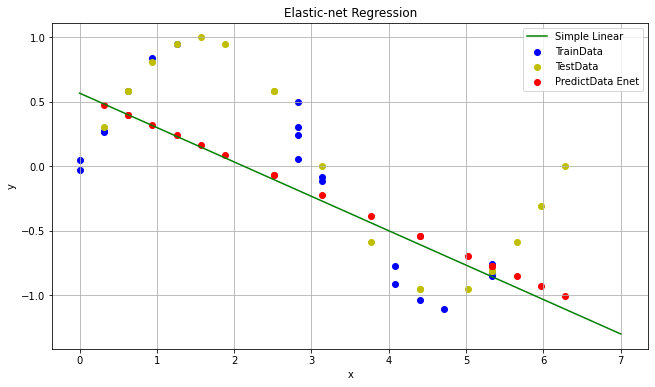

mse = 0.25617418377710865


In [88]:
plt.figure(figsize=(10.67, 6))
plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictDataEnet,color = 'r', label='PredictData Enet');


xPredictionLine = np.linspace(0,7,n)
yPredictionLine = slope*xPredictionLine+intercept
plt.plot(xPredictionLine, yPredictionLine, '-g', label='Simple Linear')



plt.title('Elastic-net Regression');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()


print('mse =',mseEnet)

##Bridge Regression